In [1]:
# Dependencies
import tweepy
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                   consumer_secret, 
                   access_token, 
                   access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
target_user = ("@CBSNews","@CNN","@FoxNews","@NYTimes","@BBCBreaking")

In [3]:
# Target Account
#Variables for holding sentiments
sentiments = []


# Counter
counter = 1

# Variables for holding sentiments
#sentiments = []

# Variable for max_id
oldest_tweet = None
for target in target_user:
    counter = 0
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

   # Get all tweets from home feed
        public_tweets = api.user_timeline(target,max_id = oldest_tweet)

   # Loop through all tweets
        for tweet in public_tweets:
       
    # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
   
        #Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet["id"] - 1
       
       # Add sentiments for each tweet into a list
            sentiments.append({"Date": tweet["created_at"],
                          "Compound": compound,
                          "User":target,
                          "Positive": pos,
                          "Negative": neu,
                          "Neutral": neg,
                           "Tweet":tweet["text"],
                          "Tweets Ago": counter})
       
       # Add to counter
            counter += 1
print(sentiments)

[{'Date': 'Wed Aug 01 03:18:04 +0000 2018', 'Compound': -0.6597, 'User': '@CBSNews', 'Positive': 0.0, 'Negative': 0.714, 'Neutral': 0.286, 'Tweet': 'LAPD releases video of officers shooting, killing hostage during standoff https://t.co/UaD6MP7iiE https://t.co/mBnR65JtKN', 'Tweets Ago': 0}, {'Date': 'Wed Aug 01 03:10:06 +0000 2018', 'Compound': -0.1027, 'User': '@CBSNews', 'Positive': 0.0, 'Negative': 0.92, 'Neutral': 0.08, 'Tweet': "N.Y. Gov. offers to pay fees for 7-year-old's lemonade stand shut down by state health inspector… https://t.co/EUCgOCGOi4", 'Tweets Ago': 1}, {'Date': 'Wed Aug 01 03:03:03 +0000 2018', 'Compound': -0.7351, 'User': '@CBSNews', 'Positive': 0.0, 'Negative': 0.492, 'Neutral': 0.508, 'Tweet': 'Kroger threatens to ban Visa cards https://t.co/3jTGsfdb9P https://t.co/o1HxBxjDk3', 'Tweets Ago': 2}, {'Date': 'Wed Aug 01 03:02:06 +0000 2018', 'Compound': -0.6597, 'User': '@CBSNews', 'Positive': 0.0, 'Negative': 0.714, 'Neutral': 0.286, 'Tweet': 'LAPD releases video of

In [4]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd
sentiments_pd.to_csv("All Tweets.csv", index=False, header=True)

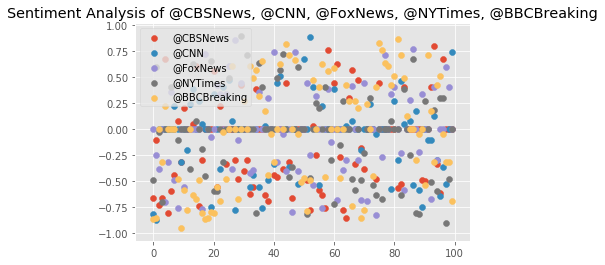

<Figure size 432x288 with 0 Axes>

In [13]:
for source in ["@CBSNews","@CNN","@FoxNews","@NYTimes","@BBCBreaking"]:
    source_df = sentiments_pd.loc[sentiments_pd["User"]==source,:]
    x_vals = source_df["Tweets Ago"]
    y_vals = source_df["Compound"]
    plt.scatter(x_vals, y_vals, marker="o",alpha=1, label = source)
    
plt.title(f"Sentiment Analysis of \
{target_user[0]}, {target_user[1]}, {target_user[2]}, {target_user[3]}, {target_user[4]}")
if not os.path.exists("Output"):
   os.makedirs("Output") 
if not os.path.exists("Output/twitter_sentiment.png"):
   plt.savefig("Output/twitter_sentiment.png")
plt.legend()
plt.show()
plt.savefig("ScatterPlot.png")

In [11]:
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Tweet,Tweets Ago,User
0,-0.6597,Wed Aug 01 03:18:04 +0000 2018,0.714,0.286,0.000,"LAPD releases video of officers shooting, kill...",0,@CBSNews
1,-0.1027,Wed Aug 01 03:10:06 +0000 2018,0.920,0.080,0.000,N.Y. Gov. offers to pay fees for 7-year-old's ...,1,@CBSNews
2,-0.7351,Wed Aug 01 03:03:03 +0000 2018,0.492,0.508,0.000,Kroger threatens to ban Visa cards https://t.c...,2,@CBSNews
3,-0.6597,Wed Aug 01 03:02:06 +0000 2018,0.714,0.286,0.000,"LAPD releases video of officers shooting, kill...",3,@CBSNews
4,0.6739,Wed Aug 01 02:40:22 +0000 2018,0.807,0.000,0.193,MIRACLE IN MEXICO: A plane crashed with 103 pe...,4,@CBSNews
5,-0.8126,Wed Aug 01 02:20:01 +0000 2018,0.567,0.433,0.000,"Activists block trains, protest fatal police s...",5,@CBSNews
6,-0.5994,Wed Aug 01 02:20:01 +0000 2018,0.755,0.245,0.000,"""Flexin' in my complexion"": Girl turns bullyin...",6,@CBSNews
7,-0.4404,Wed Aug 01 01:39:41 +0000 2018,0.873,0.127,0.000,RT @CBSThisMorning: UPDATE: A federal judge is...,7,@CBSNews
8,0.0772,Wed Aug 01 01:17:20 +0000 2018,0.942,0.000,0.058,President Trump says the time has come for vot...,8,@CBSNews
9,-0.3182,Wed Aug 01 01:09:53 +0000 2018,0.727,0.176,0.097,"""I had five minutes to give her a kiss and not...",9,@CBSNews


In [14]:
sentiments_pd.groupby(["User"]).mean()

,Compound,Negative,Neutral,Positive,Tweets Ago
User,,,,,
@BBCBreaking,-0.036484,0.81793,0.10543,0.07665,49.5
@CBSNews,-0.128098,0.84654,0.10286,0.05060,49.5
@CNN,-0.051390,0.89701,0.05871,0.04428,49.5
@FoxNews,-0.029430,0.84540,0.08500,0.06959,49.5
@NYTimes,-0.050842,0.86215,0.07582,0.06200,49.5


In [15]:
grouped_sentiments = sentiments_pd.groupby(["User"])

In [16]:
average_sentiments = grouped_sentiments["Compound"].mean()

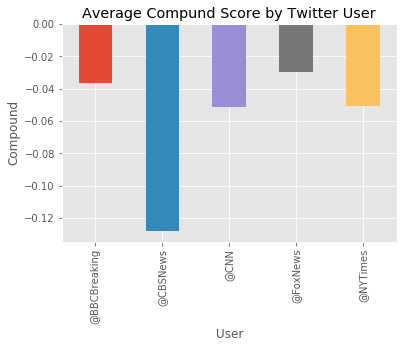

<Figure size 432x288 with 0 Axes>

In [17]:
chart = average_sentiments.plot(kind="bar", title="Average Compund Score by Twitter User")
chart.set_xlabel("User")
chart.set_ylabel("Compound")

plt.show()
plt.tight_layout()
plt.savefig("Bar Chart.png")